# Проект "Исследовательский анализ данных"

## Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Откроем файл с данными и выведем первые 5 строк на экран.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Посмотрим общую информацию о нашем датафрейме.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В нашем датафрейме имеется 23699 строк и 22 столбца. 
Названия столбцов с информацией об их содержании: 

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Все данные делятся на 4 типа: `bool`, `float64`, `int64` и `object`. 


### Шаг 2. Предобработка данных

Более чем в половине столбцов есть пропуски. Посморим, что мы можем с ними сделать. 
Начнём по порядку. Первый столбец с пропусками - `ceiling_height` (высота потолков (м)).

In [3]:
data['ceiling_height'].isnull().sum()

9195

В данном столбце 9195 пропущенных значений. Посмотрим на его значения с помощью метода `describe`.

In [4]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Значения медианы и среднего близки друг к другу и в целом похожи на правду. Заменим пропуски средним значением по столбцу.

In [5]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())

In [6]:
data['ceiling_height'].isnull().sum()

0

От пропущенных значений здесь избавились.

Проверим, сколько пропусков в столбце `floors_total` (всего этажей в доме).

In [7]:
data['floors_total'].isnull().sum()

86

In [8]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Пропусков совсем немного, заменим их медианой.

In [9]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [10]:
data['floors_total'].isnull().sum()

0

От пропусков в этом столбце мы избавились. Но обратим внимание на тип данных - `float64`. Так как число этажей в доме всегда целое число, заменим этот тип на `int64`.

In [11]:
data['floors_total'] = data['floors_total'].astype('int')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000 

Видим, что тип данных столбца `floors_total` изменился, а количество пропусков уменьшается. Посмотрим теперь на столбец `living_area` (жилая площадь в квадратных метрах(м²)).

In [13]:
data['living_area'].isnull().sum() 

1903

In [14]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Пропусков немного, а среднее похоже на адекватный размер жилой площади квартиры. Заменим им пропущенные значения.

In [15]:
data['living_area'] = data['living_area'].fillna(data['living_area'].mean())

In [16]:
data['living_area'].isnull().sum() 

0

Теперь посмотрим на столбец `is_apartment`, значения которого принимают `False` либо `True`.

In [17]:
data['is_apartment'].isnull().sum()

20924

In [18]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Пропусков очень много. исходя из тех данных, которые есть, можно предположить, что большинство пропусков в целом приняли бы значение `False`, но точно мы этого знать не можем. 
Поэтому оставим этот столбец как есть. 
Тип данных с `object` на `bool` пока менять тоже не будем, иначе все пропуски заменятся на `True`.

В столбце `kitchen_area` тоже есть пропуски. Посмотрим подробнее и поступим по той же аналогии, что и со столбцом `living_area`.

In [19]:
data['kitchen_area'].isnull().sum() 

2278

In [20]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [21]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].mean())

In [22]:
data['kitchen_area'].isnull().sum() 

0

Следующие пропуски нас ждут в столбце `balcony`. 

In [23]:
data['balcony'].isnull().sum()

11519

Пропусков много, предположим, что пропущенные значения означают отсутствие балконов. Заменим пропуски здесь на `0`.

In [24]:
data['balcony'] = data['balcony'].fillna(0)

In [25]:
data['balcony'].isnull().sum()

0

От пропусков избавились, теперь заменим тип данных этого столбца на `int`, т.к. количество балконов - целое число.

In [26]:
data['balcony'] = data['balcony'].astype('int')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000   

Незначительное количество пропусков присутствует в столбце `locality_name` (название населённого пункта).

In [28]:
data['locality_name'].isnull().sum()

49

In [29]:
data['locality_name'].value_counts()

Санкт-Петербург                               15721
посёлок Мурино                                  522
посёлок Шушары                                  440
Всеволожск                                      398
Пушкин                                          369
                                              ...  
посёлок Коробицыно                                1
поселок городского типа Рябово                    1
садовое товарищество Приладожский                 1
поселок станции Корнево                           1
посёлок при железнодорожной станции Вещево        1
Name: locality_name, Length: 364, dtype: int64

Так как пропусков совсем мало, а подавляющее число значений в столбце - `Санкт-Петербург`, то заменим их на это значение.

In [30]:
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')

In [31]:
data['locality_name'].value_counts()

Санкт-Петербург                               15770
посёлок Мурино                                  522
посёлок Шушары                                  440
Всеволожск                                      398
Пушкин                                          369
                                              ...  
посёлок Коробицыно                                1
поселок городского типа Рябово                    1
садовое товарищество Приладожский                 1
поселок станции Корнево                           1
посёлок при железнодорожной станции Вещево        1
Name: locality_name, Length: 364, dtype: int64

In [32]:
data['locality_name'].isnull().sum()

0

Видим, что пропусков не стало, они отправились в `Санкт-Петербург`.

Обратим внимание, что в столбцах `parks_around3000` и `ponds_around3000` одинаковое количество пропусков. Скорее всего они взаимосвязаны. Это можно объяснить тем, что, как правило, водоёмы находятся на территории парков. И, наоборот, парки зачастую находятся недалеко от водоёмов. Также отсутствующие значения могут означать, что парки и водоёмы в радиусе 3 км отсутствуют вовсе. Поэтому заменим пропуски в обоих столбцах нулями.

In [33]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Поменяем типы данных в этих столбцах на `int`, т.к. количества парков и озёр - целые числа.

In [34]:
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [35]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрим на столбцы `airports_nearest` и `cityCenters_nearest`. Мы можем заменить пропуски здесь медианным значением, но чтобы сделать это точнее, добавим в наш датафрейм новый столбец, где населенным пунктам присвоим значения `Санкт-Петербург` либо `Ленинградская область`. 

In [36]:
def spb_or_not(locality_name):
    if locality_name == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    return 'Ленинградская область'

In [37]:
data['spb_or_not'] = data['locality_name'].apply(spb_or_not)

In [38]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,spb_or_not
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16,51.000000,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.771499,11,18.600000,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Ленинградская область
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.771499,5,34.300000,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.771499,14,34.457852,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14,32.000000,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург


Новый столбец `spb_or_not` готов. Городу Санкт-Петербургу соответствуют значения `Санкт-Петербург`, для остальных населённых пунктов значение `Ленинградская область`.

Теперь построим сводные таблицы, чтобы посмотреть, как различаются медианные значения `airports_nearest` и `cityCenters_nearest` для Петербурга и Ленинградской области

In [39]:
airports_nearest_pvt = data.pivot_table(index='spb_or_not', values='airports_nearest', aggfunc='median')
airports_nearest_pvt

,airports_nearest
spb_or_not,
Ленинградская область,26739.5
Санкт-Петербург,26726.0


In [40]:
cityCenters_nearest_pvt = data.pivot_table(index='spb_or_not', values='cityCenters_nearest', aggfunc='median')
cityCenters_nearest_pvt

,cityCenters_nearest
spb_or_not,
Ленинградская область,30371.0
Санкт-Петербург,12243.0


В случае с расстоянием до аэропорта можно было бы сразу заполнить пропуски медианным значением, так как разницы в цифрах практически нет. А вот в случае с расстоянием до центра города разница большая. Заполним пропуски в обоих столбцах с учётом нового `spb_or_not` и проверим наличие оставшихся пропусков в таблице.

In [41]:
def median_airports_nearest(spb_or_not):
    return data.loc[data['spb_or_not'] == spb_or_not, 'airports_nearest'].median()

In [42]:
data.loc[(data['airports_nearest'].isnull()) & (data['spb_or_not'] == 'Санкт-Петербург'), 'airports_nearest'] = median_airports_nearest('Санкт-Петербург')

In [43]:
data.loc[(data['airports_nearest'].isnull()) & (data['spb_or_not'] == 'Ленинградская область'), 'airports_nearest'] = median_airports_nearest('Ленинградская область')

In [44]:
def median_cityCenters_nearest(spb_or_not):
    return data.loc[data['spb_or_not'] == spb_or_not, 'cityCenters_nearest'].median()

In [45]:
data.loc[(data['cityCenters_nearest'].isnull()) & (data['spb_or_not'] == 'Санкт-Петербург'), 'cityCenters_nearest'] = median_cityCenters_nearest('Санкт-Петербург')

In [46]:
data.loc[(data['cityCenters_nearest'].isnull()) & (data['spb_or_not'] == 'Ленинградская область'), 'cityCenters_nearest'] = median_cityCenters_nearest('Ленинградская область')

In [47]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
spb_or_not                  0
dtype: int64

Замена прошла успешно. В оставшихся столбцах `parks_nearest`, `ponds_nearest` и `days_exposition` замену производить не будем. В первых двух случаях слишком много пропусков, чтобы полагаться на среднее/медиану. Мы можем внести в датафрейм много данных далёких от действительности. В отличие от расстояний до центра или аэропорта в данном случае может быть множество локальных парков/водоёмов. Нулями тоже заменять будет нецелесообразно, так как эти парки и водоёмы существуют, неизвестно лишь расстояние до них. 

Посмотрим информацию о последнем необработанном столбце с пропусками `days_exposition` (сколько дней было размещено объявление (от публикации до снятия)).

In [48]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим, что разброс значений здесь очень большой: от 1 до 1580 дней. Заменять средним/медианой/нулями будет нецелесообразным. У нас есть заполненный столбец с датами начала публикаций. Если бы был такой же, только с датами снятия публикаций, тогда мы смогли бы высчитать пропущенные значения в `days_exposition`. Но такого столбца нет, поэтому заполнять эти пропуски не будем.

### Вывод

Мы обработали пропущенные значения в датафрейме и, где это можно было сделать, заполнили пропуски. В 4-х столбцах это сделать оказалось тяжелее ввиду отсутствия дополнительной информации. 
Также мы в некоторых столбцах заменили типы данных с `float64` на `int64`.

### Шаг 3. Посчитайте и добавьте в таблицу

Посчитаем и добавим в таблицу цену квадратного метра.

In [49]:
data['price_per_square'] = data['last_price']/data['total_area']
data['price_per_square']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_per_square, Length: 23699, dtype: float64

Округлим значения и выведем первые 5 строк датафрейма.

In [50]:
data['price_per_square'] = data['price_per_square'].round()
data['price_per_square']

0        120370.0
1         82921.0
2         92786.0
3        408176.0
4        100000.0
           ...   
23694     72491.0
23695     52542.0
23696     44092.0
23697    149511.0
23698     41796.0
Name: price_per_square, Length: 23699, dtype: float64

In [51]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,spb_or_not,price_per_square
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16,51.000000,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.771499,11,18.600000,1,NaN,...,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Ленинградская область,82921.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.771499,5,34.300000,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92786.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.771499,14,34.457852,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург,408176.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14,32.000000,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.0


Приведём в порядок дни недели, месяцы и годы публикации объявлений.

In [52]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

Добавим в наш датафрейм отдельные столбцы с названиями дней и месяцев, а также отдельный столбец с годом.

In [53]:
data['weekday'] = data['first_day_exposition'].dt.day_name()
data['month'] = data['first_day_exposition'].dt.month_name()
data['year'] = data['first_day_exposition'].dt.year

In [54]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,spb_or_not,price_per_square,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,NaN,...,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.0,Thursday,March,2019
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.600000,1,NaN,...,0,NaN,0,NaN,81.0,Ленинградская область,82921.0,Tuesday,December,2018
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.300000,4,NaN,...,1,90.0,2,574.0,558.0,Санкт-Петербург,92786.0,Thursday,August,2015
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14,34.457852,9,NaN,...,2,84.0,3,234.0,424.0,Санкт-Петербург,408176.0,Friday,July,2015
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.000000,13,NaN,...,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.0,Tuesday,June,2018


Создадим 3 новых столбца, который разделит квартиры на 3 группы с учётом этажа: `Первый`, `Последний`, `Другой`.

In [55]:
data['first_floor']=(data['floor']==1)*1
data['last_floor']=(data['floor']==data['floors_total'])*1
def other_floor (row):
    if row['first_floor']==1:
        return 0
    elif row['last_floor']==1:
        return 0
    return 1
 
data['other_floor'] = data.apply(other_floor, axis = 1)

In [56]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,spb_or_not,price_per_square,weekday,month,year,first_floor,last_floor,other_floor
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,NaN,...,755.0,NaN,Санкт-Петербург,120370.0,Thursday,March,2019,0,0,1
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.600000,1,NaN,...,NaN,81.0,Ленинградская область,82921.0,Tuesday,December,2018,1,0,0
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.300000,4,NaN,...,574.0,558.0,Санкт-Петербург,92786.0,Thursday,August,2015,0,0,1
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14,34.457852,9,NaN,...,234.0,424.0,Санкт-Петербург,408176.0,Friday,July,2015,0,0,1
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.000000,13,NaN,...,48.0,121.0,Санкт-Петербург,100000.0,Tuesday,June,2018,0,0,1


Видим, что в датафрейме появились новые столбцы с соответствующими значениями: `first_floor`, `last_floor` и `other_floor`. 

Теперь добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [57]:
data['part_of_living_area'] = data['living_area']/data['total_area']*100
data['part_of_living_area'] = data['part_of_living_area'].round()
data['part_of_kitchen_area'] = data['kitchen_area']/data['total_area']*100
data['part_of_kitchen_area'] = data['part_of_kitchen_area'].round()

In [58]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,spb_or_not,price_per_square,weekday,month,year,first_floor,last_floor,other_floor,part_of_living_area,part_of_kitchen_area
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,NaN,...,Санкт-Петербург,120370.0,Thursday,March,2019,0,0,1,47.0,23.0
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.600000,1,NaN,...,Ленинградская область,82921.0,Tuesday,December,2018,1,0,0,46.0,27.0
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.300000,4,NaN,...,Санкт-Петербург,92786.0,Thursday,August,2015,0,0,1,61.0,15.0
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14,34.457852,9,NaN,...,Санкт-Петербург,408176.0,Friday,July,2015,0,0,1,22.0,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.000000,13,NaN,...,Санкт-Петербург,100000.0,Tuesday,June,2018,0,0,1,32.0,41.0


### Вывод

Мы провели некоторые рассчёты и по их итогам в нашем датафрейме появились новые столбцы с данными:

* `price_per_square` - здесь посчитана цена за 1 квадратный метр;
* `weekday`, `month`, `year` - отдельные столбцы с днями недели, месяцами и годами;
* `first_floor`, `last_floor`, `other_floor` - здесь содержится информация о том, находится квартира на первом, последнем или другом этаже;
* `part_of_living_area` - здесь посчитано соотношение жилой и общей площади квартиры;
* `part_of_kitchen_area` - здесь посчитано соотношение кухни и общей площади квартиры.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

In [59]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

В среднем площадь квартиры составляет около 60 квадртных метров. Лишь 25% квартир имеют площадь от 70 квадратных метров.

In [60]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Для удобства восприятия разделим столбец на 1000000.

In [61]:
data['last_price'] = data['last_price'] / 1000000

In [62]:
data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

Средняя цена квартиры составляет около 5 миллионов. В то время как половина от всех квартир стоит не дороже 4.3 милионов.

In [63]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Однокомнатных квартир на продажу больше всего. 

In [64]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.771499
std          0.986523
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max        100.000000
Name: ceiling_height, dtype: float64

Основные значения высоты потолков лежат в диапазоне от 2.6 метра до 2.77 метра.

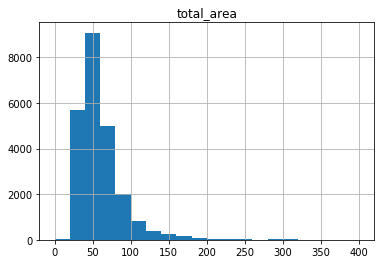

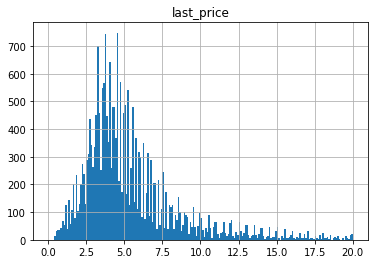

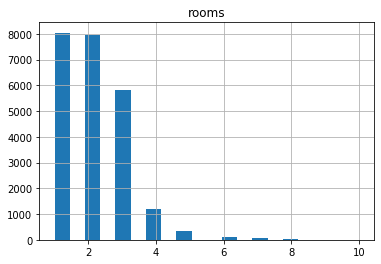

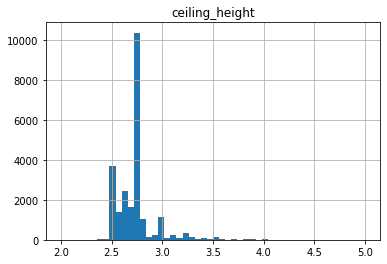

In [65]:
dict_for_hist = {
    'total_area' : [20, (0, 400)],
    'last_price' : [200, (0, 20)],
    'rooms' : [20, (1, 10)],
    'ceiling_height' : [50, (2, 5)]
}
 
for column in dict_for_hist.keys():
    data[column].hist(bins = dict_for_hist[column][0], range = dict_for_hist[column][1])
    plt.title(column)
    plt.show()

Мы получили четыре гистограммы.

Изучим время продажи квартиры.

In [66]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Посотроим гистограмму по этим данным.

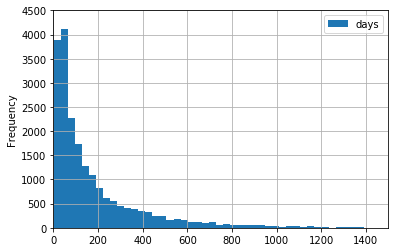

In [67]:
data.plot(kind='hist',
y='days_exposition',  
xlim=(0, 1500),
ylim=(0, 4500),
bins=50,
linewidth=2,
label='days', 
grid=True,
legend=True) 

Среднее и медиана различаются практически в 2 раза: 180 и 95 соответственно. Это означает, что примерно половина квартир продаётся менее, чем за 3 месяца. Однако, в среднем этот показатель составляет около 180 дней. Так происходит потому что  некотрые квартиры продаются очень долго (намного дольше, чем основная масса).

Построим также график boxplot.

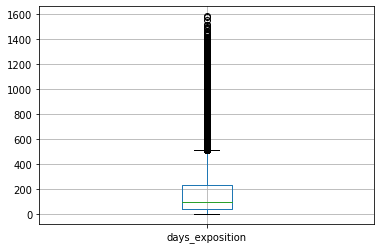

In [68]:
data.boxplot(column='days_exposition')
plt.show()

75% всех наших наблюдений ограничиваются значением 232 дня. Если квартира продаётся дольше, то такие продажи можно считать долгими. А если продажа длится более 500 дней, то её уже можно считать аномально долгой. 

Ну а быстрыми продажами можно считать все те, которые осуществились примерно до 30 дней. 

Уберём редкие и выбивающиеся значения из этого столбца.

In [69]:
data = data.query('days_exposition > 20 and days_exposition < 500')

Построим boxplot для столбца `total_area`, `rooms`, `ceiling_height` и `last_price` и тоже удалим выбросы.

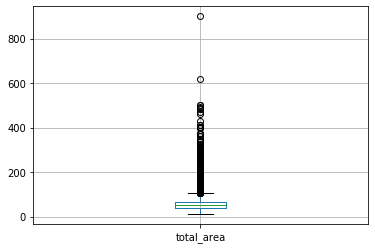

In [70]:
data.boxplot(column='total_area')
plt.show()

In [71]:
data = data.query('total_area > 20 and total_area < 150')

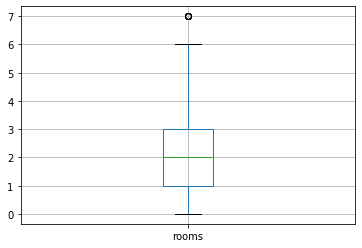

In [72]:
data.boxplot(column='rooms')
plt.show()

In [73]:
data = data.query('rooms < 6')

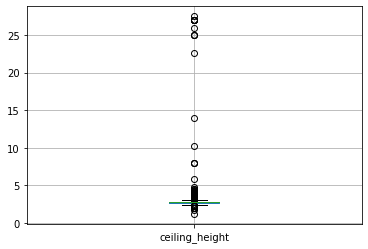

In [74]:
data.boxplot(column='ceiling_height')
plt.show()

In [75]:
data = data.query('ceiling_height > 2 and ceiling_height < 3')

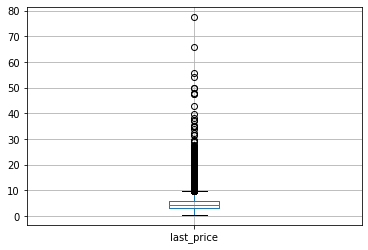

In [76]:
data.boxplot(column='last_price')
plt.show()

In [77]:
data = data.query('last_price < 10')

В итоге мы удалили:
* строки, в которых количество дней размещения объявления меньше 20 и больше 500;
* стороки, в которых общая площадь составляет меньше 20 и больше 150 кв. метров;
* строки, в которых количество комнат больше 5;
* строки, в котрых высота потолков меньше 2 и больше 3 метров;
* строки, в которых цена квартиры больше 10 миллионов.

Построим диаграмму разброса, чтобы узнать: есть ли зависимость между ценой на квартиру и её площадью.

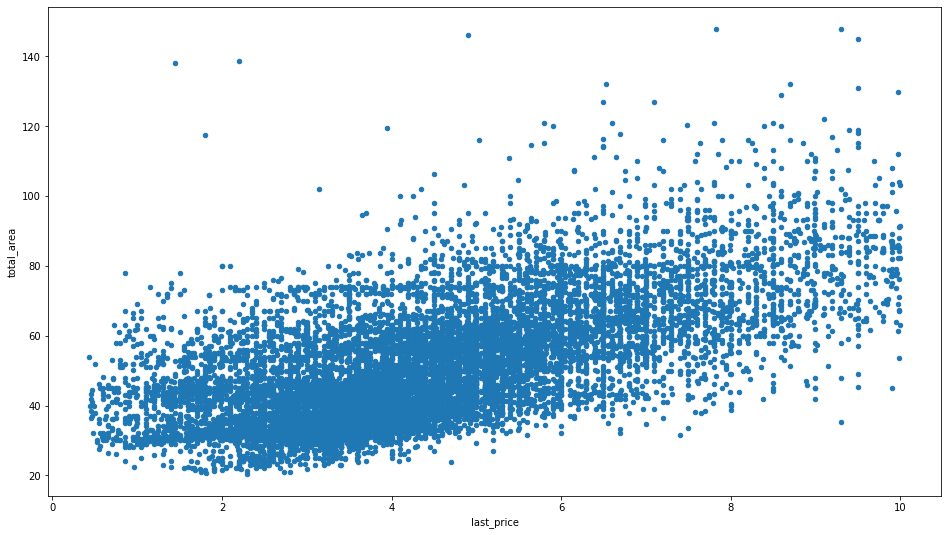

In [78]:
data.plot(x='last_price',y='total_area',kind='scatter',figsize=(16,9))

Как и ожидалось, мы обнаружили общую зависимость: чем выше стоимость квартиры, тем больше её площадь.

Построим boxplot, чтобы проследить зависимость цены от количества комнат.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


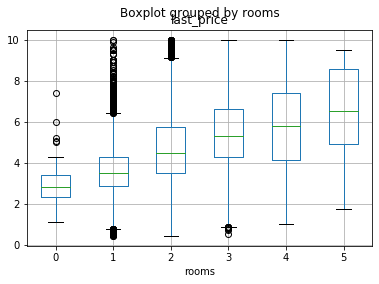

In [79]:
data.boxplot(column='last_price', by='rooms')
plt.show()

Видим, что цена квартиры в основном повышается с ростом числа комнат.

Построим диаграмму рассеивания, чтобы узнать, есть ли зависимость между ценой на квартиру и удалённостью её от центра.

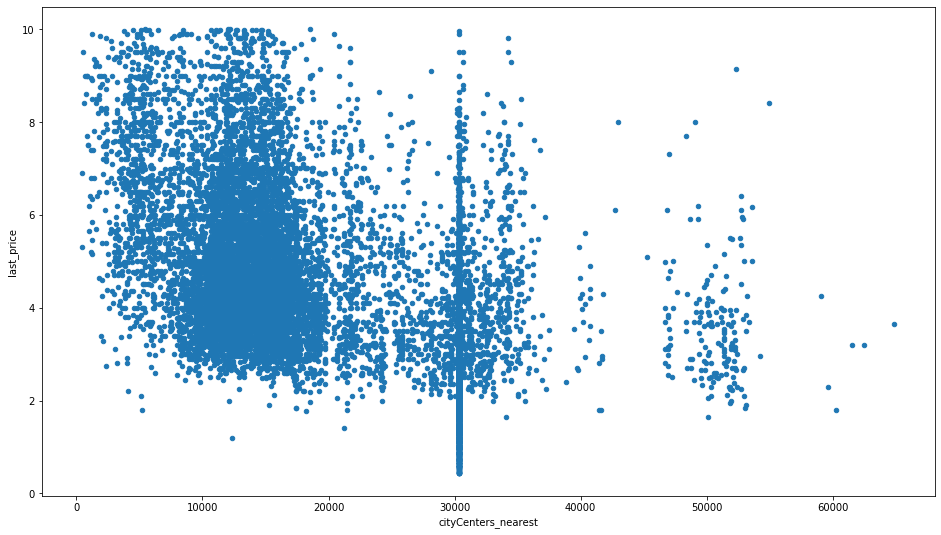

In [80]:
data.plot(x='cityCenters_nearest',y='last_price',kind='scatter',figsize=(16,9))

Ожидаемо, цена квартиры зависит от близости к центру города: обычно чем ближе, тем дороже.

Чтобы проследить зависимость цены от того, на каком этаже находится квартира, построим сводную таблицу, в которой разобьём цены на 5 категорий.

In [81]:
data['last_price_group'] = pd.qcut(data['last_price'],5)
data.groupby('last_price_group')['first_floor'].agg(['count','mean'])

,count,mean
last_price_group,,
"(0.429, 2.99]",2768,0.207370
"(2.99, 3.764]",2699,0.141904
"(3.764, 4.594]",2733,0.116356
"(4.594, 5.85]",2760,0.102174
"(5.85, 10.0]",2707,0.074252


Теперь построим столбчатую диаграмму.

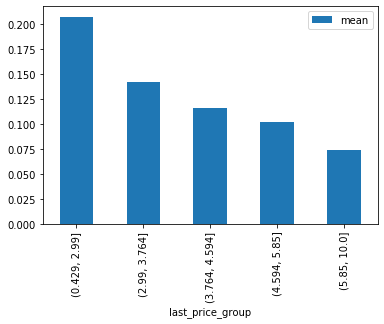

In [82]:
data.groupby('last_price_group')['first_floor'].agg(['mean']).plot(kind='bar')

Видим, что доля квартир на первом этаже понижается с ростом цены. Посмотрим, есть ли зависимость между ценой и квартирами на последнем этаже.

In [83]:
data.groupby('last_price_group')['last_floor'].agg(['count','mean'])

,count,mean
last_price_group,,
"(0.429, 2.99]",2768,0.201590
"(2.99, 3.764]",2699,0.124861
"(3.764, 4.594]",2733,0.125137
"(4.594, 5.85]",2760,0.108333
"(5.85, 10.0]",2707,0.101219


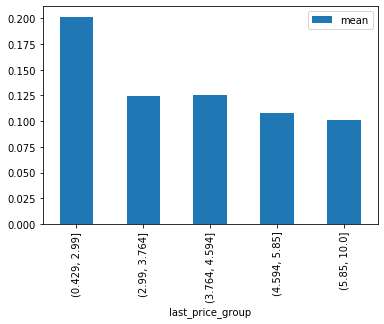

In [84]:
data.groupby('last_price_group')['last_floor'].agg(['mean']).plot(kind='bar')

Похожая зависимость, как и в случае с первым этажом, однако, не такая выраженная, особенно для квартир от 3 миллионов. Посмотрим, есть ли зависимость цены от других этажей.

In [85]:
data.groupby('last_price_group')['other_floor'].agg(['count','mean'])

,count,mean
last_price_group,,
"(0.429, 2.99]",2768,0.594653
"(2.99, 3.764]",2699,0.733976
"(3.764, 4.594]",2733,0.758507
"(4.594, 5.85]",2760,0.790217
"(5.85, 10.0]",2707,0.825268


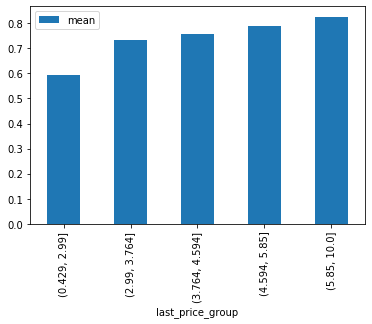

In [86]:
data.groupby('last_price_group')['other_floor'].agg(['mean']).plot(kind='bar')

Здесь наблюдаем следующую тенденцию: если этаж не первый и не последний, то скорее всего квартира будет стоить дороже.

Построим графики boxplot, чтобы узнать, есть ли зависимость между ценой квартиры и дня, месяца, года размещения объявления.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


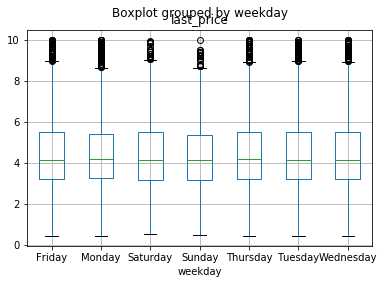

In [87]:
data.boxplot(column='last_price', by='weekday')
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


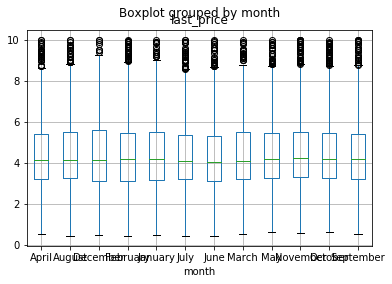

In [88]:
data.boxplot(column='last_price', by='month')
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


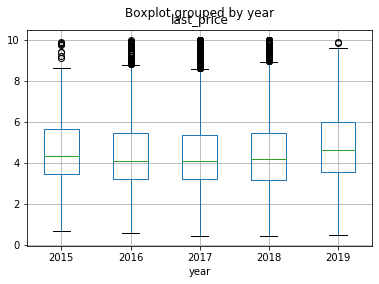

In [89]:
data.boxplot(column='last_price', by='year')
plt.show()

Выраженной зависимости мы здесь не наблюдаем.

In [90]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square,year,first_floor,last_floor,other_floor,part_of_living_area,part_of_kitchen_area
total_images,1.000000,0.155139,0.087964,0.065993,-0.062320,0.007526,0.056909,0.026441,-0.022135,-0.017019,...,0.004723,0.008963,0.004788,0.116995,0.129598,-0.029571,0.001530,0.021127,-0.048004,-0.063311
last_price,0.155139,1.000000,0.654029,0.410920,0.158994,0.283320,0.483959,0.182980,-0.067472,-0.044732,...,0.238152,-0.006027,0.029409,0.608319,-0.000291,-0.134590,-0.090232,0.170591,-0.107639,-0.188240
total_area,0.087964,0.654029,1.000000,0.805368,0.095920,-0.006767,0.852764,-0.031943,-0.117411,-0.074795,...,0.061155,-0.001414,0.068373,-0.159592,-0.060593,0.004853,0.012882,-0.011970,0.036223,-0.508706
rooms,0.065993,0.410920,0.805368,1.000000,-0.084467,-0.229874,0.849957,-0.188773,-0.168622,-0.112496,...,0.001827,0.014268,0.055323,-0.284837,-0.051897,0.081928,0.043682,-0.095246,0.294601,-0.686381
ceiling_height,-0.062320,0.158994,0.095920,-0.084467,1.000000,0.244768,-0.006822,0.169091,0.035093,0.038659,...,0.042675,-0.059527,-0.008806,0.112436,-0.169527,-0.063364,-0.027120,0.069862,-0.133493,0.205381
floors_total,0.007526,0.283320,-0.006767,-0.229874,0.244768,1.000000,-0.158390,0.669977,0.078676,0.053989,...,0.000914,0.032440,-0.034405,0.400379,0.021788,-0.231428,-0.215854,0.339445,-0.262949,0.372766
living_area,0.056909,0.483959,0.852764,0.849957,-0.006822,-0.158390,1.000000,-0.141729,-0.069920,-0.043680,...,0.027724,0.008103,0.045278,-0.236226,-0.043176,0.059138,0.039876,-0.074665,0.521057,-0.596938
floor,0.026441,0.182980,-0.031943,-0.188773,0.169091,0.669977,-0.141729,1.000000,0.045343,0.038719,...,0.001379,0.014925,-0.034089,0.289189,0.016627,-0.388871,0.104906,0.213067,-0.200230,0.272572
studio,-0.022135,-0.067472,-0.117411,-0.168622,0.035093,0.078676,-0.069920,0.045343,1.000000,-0.004755,...,-0.010437,-0.011624,-0.025598,0.057119,0.016105,-0.008470,-0.022296,0.023474,0.089346,0.217469
open_plan,-0.017019,-0.044732,-0.074795,-0.112496,0.038659,0.053989,-0.043680,0.038719,-0.004755,1.000000,...,0.005152,0.002302,-0.016517,0.032625,-0.016768,-0.014119,-0.006962,0.016008,0.060891,0.135306


In [91]:
data['last_price'].corr(data['rooms'])

0.410920283877633

In [92]:
data['last_price'].corr(data['cityCenters_nearest'])

-0.5081273082202423

In [93]:
data['last_price'].corr(data['total_area'])

0.65402867729483

Учитывая, что коэффициент корреляции может принимать значения от -1 до 1, мы можем сделать следующие выводы:
* есть положительная корреляция в случае с комнатами и общей площадью. Мы видим, что с ростом числа комнат и площади растёт и цена;
* есть отрицательная корреляция цены с удалённостью от центра. Здесь также всё ясно: чем выше будет число км, тем ниже будет цена.

Выделим среди 10 населённых пунктов с наибольшим числом объявлений пункты с самой высокой и низкой стоимостью жилья.

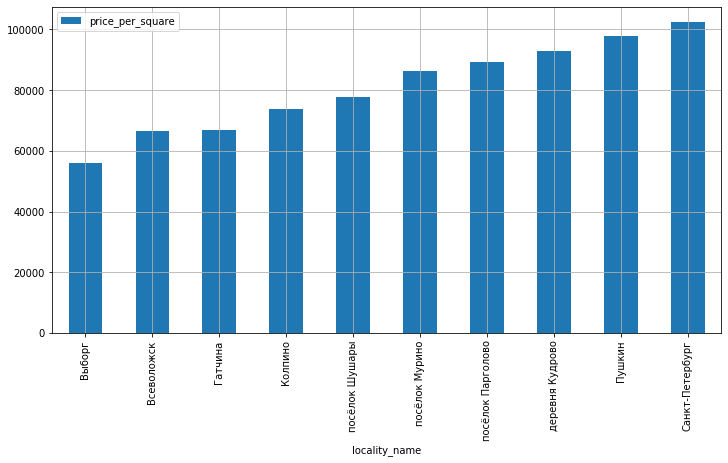

In [94]:
top10 = data['locality_name'].value_counts().head(10)
(data.query('locality_name in @top10.index')
 .pivot_table(index = 'locality_name', values = 'price_per_square', aggfunc= 'mean')
 .sort_values(by = 'price_per_square').plot(kind = 'bar', figsize = (12,6), grid = True)
       )

Самая низкая стоимость жилья в Выборге, а самые дорогие квартиры - в Санкт-Петербурге.

Создадим столбец с расстоянием до центра в километрах и округлим до целых значений.

In [95]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
data['cityCenters_nearest_km']

1        19
5        30
6        19
8        30
9        15
         ..
23687    17
23689    16
23692    30
23693    34
23695    30
Name: cityCenters_nearest_km, Length: 13667, dtype: int64

Отфильтруем таблицу по Санкт-Петербургу.

In [96]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
data_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,weekday,month,year,first_floor,last_floor,other_floor,part_of_living_area,part_of_kitchen_area,last_price_group,cityCenters_nearest_km
9,18,5.40,61.0,2017-02-26,3,2.500000,9,43.6,7,NaN,...,Sunday,February,2017,0,0,1,71.0,11.0,"(4.594, 5.85]",15
10,5,5.05,39.6,2017-11-16,1,2.670000,12,20.3,3,NaN,...,Thursday,November,2017,0,0,1,51.0,21.0,"(4.594, 5.85]",14
18,8,3.25,31.0,2017-01-27,1,2.500000,5,19.4,2,NaN,...,Friday,January,2017,0,0,1,63.0,18.0,"(2.99, 3.764]",11
21,13,3.20,31.6,2018-03-14,1,2.771499,5,16.9,2,NaN,...,Wednesday,March,2018,0,0,1,53.0,18.0,"(2.99, 3.764]",10
24,8,6.50,97.2,2015-10-31,2,2.771499,3,46.5,1,NaN,...,Saturday,October,2015,1,0,0,48.0,20.0,"(5.85, 10.0]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23676,19,3.55,36.4,2016-06-08,1,2.771499,16,14.9,13,NaN,...,Wednesday,June,2016,0,0,1,41.0,26.0,"(2.99, 3.764]",12
23681,13,5.25,43.0,2018-05-11,2,2.500000,5,29.0,2,NaN,...,Friday,May,2018,0,0,1,67.0,14.0,"(4.594, 5.85]",7
23686,8,3.30,31.0,2017-04-29,1,2.550000,9,18.0,6,NaN,...,Saturday,April,2017,0,0,1,58.0,21.0,"(2.99, 3.764]",12
23687,6,3.20,39.0,2017-12-16,1,2.771499,9,20.0,6,NaN,...,Saturday,December,2017,0,0,1,51.0,28.0,"(2.99, 3.764]",17


Теперь посчитаем цену для каждого километра.

Построим график зависимости цены от удалённости от центра. Определим центральную зону.

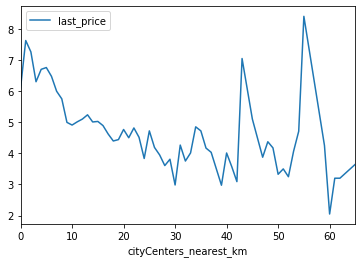

In [98]:
data.groupby(['cityCenters_nearest_km']).agg({'last_price' : 'mean'}).plot()

Видим, что график сильно меняется от 15-го километра. Значит, наша центральная область ограничивается 15-ю километрами.

Выделим сегмент квартир в центре.

In [99]:
data_spb_centr = data_spb[data_spb['cityCenters_nearest_km'] <= 15]
data_spb_centr

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,weekday,month,year,first_floor,last_floor,other_floor,part_of_living_area,part_of_kitchen_area,last_price_group,cityCenters_nearest_km
9,18,5.40,61.0,2017-02-26,3,2.500000,9,43.6,7,NaN,...,Sunday,February,2017,0,0,1,71.0,11.0,"(4.594, 5.85]",15
10,5,5.05,39.6,2017-11-16,1,2.670000,12,20.3,3,NaN,...,Thursday,November,2017,0,0,1,51.0,21.0,"(4.594, 5.85]",14
18,8,3.25,31.0,2017-01-27,1,2.500000,5,19.4,2,NaN,...,Friday,January,2017,0,0,1,63.0,18.0,"(2.99, 3.764]",11
21,13,3.20,31.6,2018-03-14,1,2.771499,5,16.9,2,NaN,...,Wednesday,March,2018,0,0,1,53.0,18.0,"(2.99, 3.764]",10
24,8,6.50,97.2,2015-10-31,2,2.771499,3,46.5,1,NaN,...,Saturday,October,2015,1,0,0,48.0,20.0,"(5.85, 10.0]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23671,3,3.45,35.3,2017-04-14,1,2.500000,9,17.5,4,False,...,Friday,April,2017,0,0,1,50.0,21.0,"(2.99, 3.764]",15
23673,9,3.10,23.0,2018-03-19,1,2.800000,9,12.6,1,NaN,...,Monday,March,2018,1,0,0,55.0,22.0,"(2.99, 3.764]",12
23676,19,3.55,36.4,2016-06-08,1,2.771499,16,14.9,13,NaN,...,Wednesday,June,2016,0,0,1,41.0,26.0,"(2.99, 3.764]",12
23681,13,5.25,43.0,2018-05-11,2,2.500000,5,29.0,2,NaN,...,Friday,May,2018,0,0,1,67.0,14.0,"(4.594, 5.85]",7


Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [100]:
data_spb_centr['total_area'].describe()

count    6230.000000
mean       51.531029
std        16.656568
min        21.000000
25%        39.000000
50%        47.200000
75%        61.000000
max       147.800000
Name: total_area, dtype: float64

Средняя площадь квартир в центре составляет примерно 51,5 кв. метра. Показатель для общих выводов составил 60 кв. метров.

In [101]:
data_spb_centr['last_price'].describe()

count    6230.000000
mean        5.298093
std         1.695032
min         1.200000
25%         4.000000
50%         4.900000
75%         6.350000
max         9.999999
Name: last_price, dtype: float64

А вот средняя цена уменьшилась с 6.5 миллионов до 5.3 миллионов.

In [102]:
data_spb_centr['rooms'].value_counts()

1    2407
2    2230
3    1320
4     204
0      50
5      19
Name: rooms, dtype: int64

Количество однокомнатных и двухкомантных квартир по-прежнему преобладает над остальными.

In [103]:
data_spb_centr['ceiling_height'].describe()

count    6230.000000
mean        2.686713
std         0.112811
min         2.300000
25%         2.600000
50%         2.770000
75%         2.771499
max         2.990000
Name: ceiling_height, dtype: float64

Минимальная высота потолков зафиксирована на отметке 2.3 метра. А максимальная - 2.99 метра.

Построим гистограмы для всех параметров.

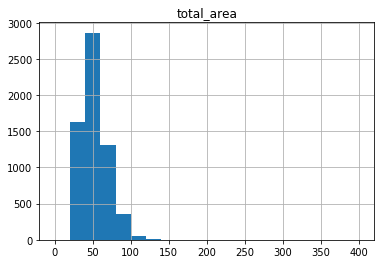

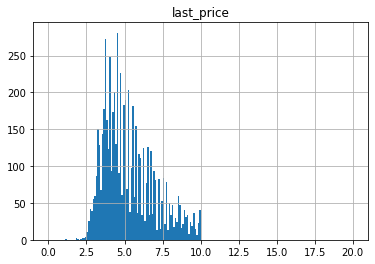

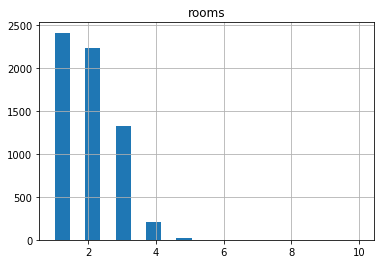

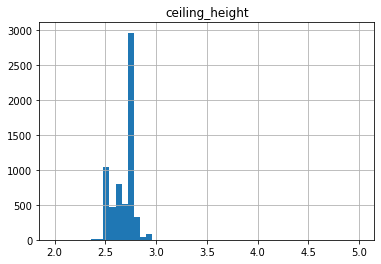

In [104]:
dict_for_hist = {
    'total_area' : [20, (0, 400)],
    'last_price' : [200, (0, 20)],
    'rooms' : [20, (1, 10)],
    'ceiling_height' : [50, (2, 5)]
}
 
for column in dict_for_hist.keys():
    data_spb_centr[column].hist(bins = dict_for_hist[column][0], range = dict_for_hist[column][1])
    plt.title(column)
    plt.show()

Построим boxplot, чтобы оценить зависимость цены от количества комнат в центральном сегменте.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


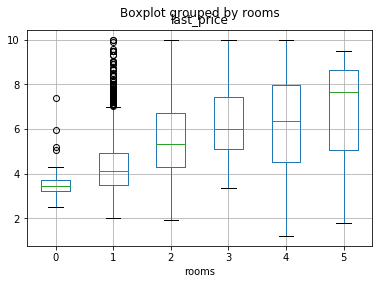

In [105]:
data_spb_centr.boxplot(column='last_price', by='rooms')
plt.show()

Цена растёт с ростом количестава комнат.

Построим столбчатые диаграмы для оценки зависимости цены от нахождения квартиры на первом, последнем или других этажах.

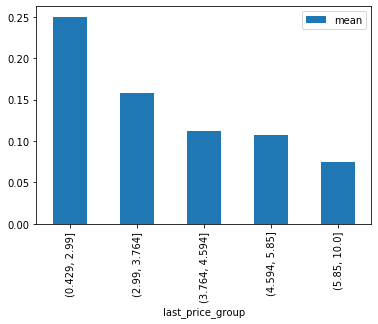

In [106]:
data_spb_centr.groupby('last_price_group')['first_floor'].agg(['mean']).plot(kind='bar')

Так же как и в общих выводах наблюдаем, что квартира на первом этаже скорее всего будет стоить дешевле.

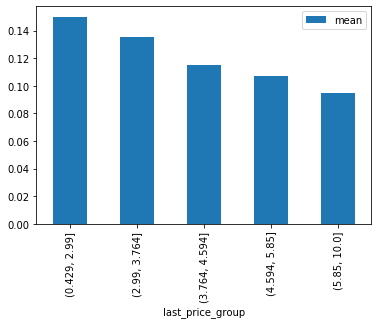

In [107]:
data_spb_centr.groupby('last_price_group')['last_floor'].agg(['mean']).plot(kind='bar')

В отличие от общих выводов видим, что квартира на последнем этаже в центре скорее будет стоить дороже. Это может быть связано с красивыми видами из окон.

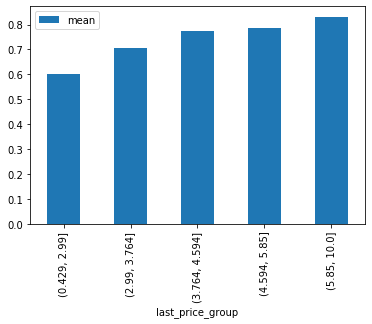

In [108]:
data_spb_centr.groupby('last_price_group')['other_floor'].agg(['mean']).plot(kind='bar')

Здесь особо сильной зависимости мы не наблюдаем, как и в общих выводах.

Построим графики boxplot, чтобы оценить зависимость цены от дня недели, месяца и года размещения объявления.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


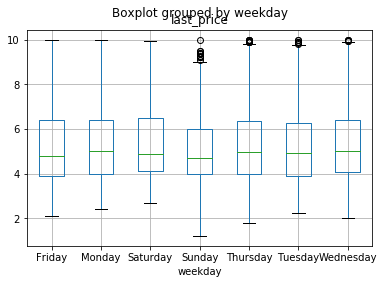

In [109]:
data_spb_centr.boxplot(column='last_price', by='weekday')
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


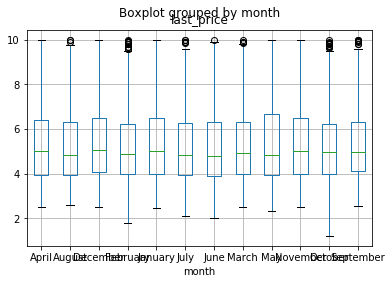

In [110]:
data_spb_centr.boxplot(column='last_price', by='month')
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


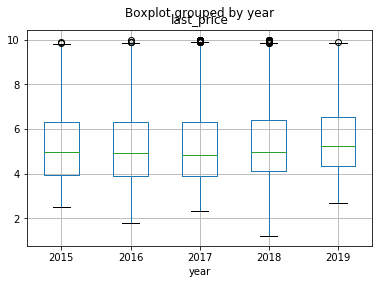

In [111]:
data_spb_centr.boxplot(column='last_price', by='year')
plt.show()

Как и в случае с общими выводами ярко выраженной зависимости от даты размещения мы не наблюдаем.

Построим график, чтобы узнать, если зависимость между ценой и удалённостью от центра для центрального района.

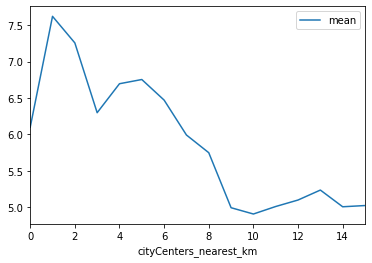

In [112]:
data_spb_centr.groupby('cityCenters_nearest_km')['last_price'].agg(['mean']).plot()

Видим, что в целом зависимость есть: чем ближе к центру, тем квартиры в среднем дороже, особенно в пределе от 1 до 2 км.

### Шаг 5. Общий вывод

В этом проекте мы исследовали объявления о продаже квартир в Ленинградской области.
Сначала мы предобратали данные: определили (и где смогли избавились от них) пропущенные значения, привели данные к нужным типам.

Затем мы добавили в таблицу дополнительные данные: цену квадратного метра, соотношения площадей. А также сделали разбивку даты и этажей.

После чего провели исследовательский анализ данных. Для начала мы изучили следующие параметры: площадь, цена, число комнат, высота потолков, время продажи квартиры. Также мы провели исследования, как тот или иной параметр влияет на цену. Такой анализ показал, что:
* цена квартиры зависит от удалённости от центра города (чем дальше, тем дешевле);
* цена особо не зависит от даты размещения объявления;
* цена увеличивается с увеличением числа комнат и общей площади квартиры;
* если квартира находится на первом этаже, то скорее всего она будет стоить дешевле. Такая же закономерность прослеживается и для последнего этажа, исключая центр Санкт-Петербурга. Из-за наличия панорамных видов цена таких квартир будет скорее дороже.

Однако стоит понимать, что это общие выводы, и, возможно, что Квартира-1 с двумя комнатами будет стоить также, как и Квартира-2 с пятью комнатами. Например, если Квартира-1 находится в центральном районе Петербурга, а Квартира-2 где-то на окраине города. 